## Instalando paquetes necesarios

In [ ]:
#%pip install kaggle
#%pip install opendatasets


## Importando los paquetes necesarios

In [1]:
import opendatasets as od
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops



## Descargando el conjunto de datos
Usaremos las instrucciones del siguiente link(https://www.geeksforgeeks.org/how-to-download-kaggle-datasets-into-jupyter-notebook/) para descargar los datos directamente de kaggle, tenga en cuenta que son 800 MB por lo que puede demorarse en descargar. 

In [5]:
if not (os.path.isdir('dogs-vs-cats')):
    od.download( "https://www.kaggle.com/c/dogs-vs-cats/data") 
else:
    with zipfile.ZipFile('dogs-vs-cats/train.zip', 'r') as zip_ref:
        zip_ref.extractall('../Scripts/dogs-vs-cats')
    with zipfile.ZipFile('dogs-vs-cats/test1.zip', 'r') as zip_ref:
        zip_ref.extractall('../Scripts/dogs-vs-cats')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading dogs-vs-cats.zip to .\dogs-vs-cats


100%|██████████| 812M/812M [02:20<00:00, 6.04MB/s] 



Extracting archive .\dogs-vs-cats/dogs-vs-cats.zip to .\dogs-vs-cats


## Explorando el conjunto de datos
Visualicemos algunas de las imágenes que tiene nuestro conjunto de datos de entrenamiento. Se mostrarán las primeras 9 imágenes de perros 9 de gatos:

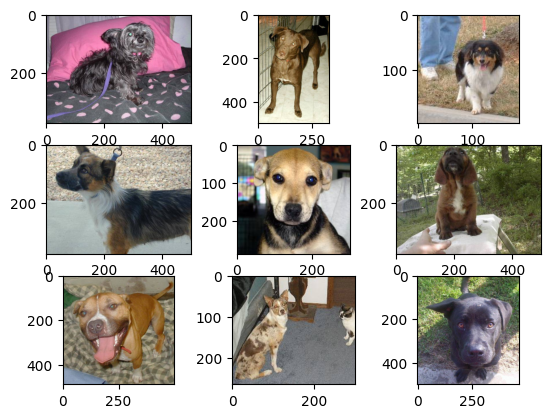

In [8]:
folder = "./dogs-vs-cats/train/train/"
# Dogs
for i in range(9):
    plt.subplot(330+1+i)
    filename = folder+'dog.'+str(i)+'.jpg'
    image = imread(filename)
    plt.imshow(image)

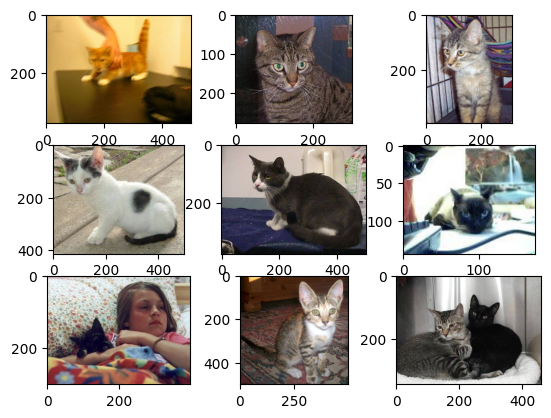

In [9]:
# Cats
for i in range(9):
    plt.subplot(330+1+i)
    filename = folder+'cat.'+str(i)+'.jpg'
    image = imread(filename)
    plt.imshow(image)

Como se puede ver tienen diferentes resoluciones. Algunas están verticales y otras horizontales. Podemos normalizar las imágenes poniendolas todas de la misma resolución. 
Hay dos formas de hacerlo, o se cargan todas en memoria lo que significaría 12 gb de ram ocupados o se cargan por lotes, hagamos las dos formas.

Vamos a crear una carpeta para los gatos y otra para los perros tanto para train como para test

In [22]:
folder = "./dogs-vs-cats/"
subdirs = ['train1/train/', 'test1/test/']
labeldirs = ['cats/', 'dogs/']

In [24]:
for subdir in subdirs:
 # create label subdirectories
    for labldir in labeldirs:
        newdir = folder + subdir + labldir
        os.makedirs(newdir, exist_ok=True)

random.seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
src_directory = folder+'train1/train/'
for file in os.listdir(src_directory):
    print(file)
    if random.random() < val_ratio:
        dst_dir = folder+'test1/test/'
    else:
        dst_dir = folder+'train1/train/'
    if file.startswith('cat'):
        dst_dir = dst_dir+'cats/'
        dst = dst_dir + file
    elif file.startswith('dog'):
        dst_dir = dst_dir+'dogs/'
        dst = dst_dir  + file
    try:
        shutil.copy2(src_directory+file, dst)
    except PermissionError as e:
        print(f"Error de permisos al copiar {file}: {e}")
    except Exception as e:
        print(f"Ocurrió un error al copiar {file}: {e}")

cat.0.jpg
cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg
cat.10009.jpg
cat.1001.jpg
cat.10010.jpg
cat.10011.jpg
cat.10012.jpg
cat.10013.jpg
cat.10014.jpg
cat.10015.jpg
cat.10016.jpg
cat.10017.jpg
cat.10018.jpg
cat.10019.jpg
cat.1002.jpg
cat.10020.jpg
cat.10021.jpg
cat.10022.jpg
cat.10023.jpg
cat.10024.jpg
cat.10025.jpg
cat.10026.jpg
cat.10027.jpg
cat.10028.jpg
cat.10029.jpg
cat.1003.jpg
cat.10030.jpg
cat.10031.jpg
cat.10032.jpg
cat.10033.jpg
cat.10034.jpg
cat.10035.jpg
cat.10036.jpg
cat.10037.jpg
cat.10038.jpg
cat.10039.jpg
cat.1004.jpg
cat.10040.jpg
cat.10041.jpg
cat.10042.jpg
cat.10043.jpg
cat.10044.jpg
cat.10045.jpg
cat.10046.jpg
cat.10047.jpg
cat.10048.jpg
cat.10049.jpg
cat.1005.jpg
cat.10050.jpg
cat.10051.jpg
cat.10052.jpg
cat.10053.jpg
cat.10054.jpg
cat.10055.jpg
cat.10056.jpg
cat.10057.jpg
cat.10058.jpg
cat.10059.jpg
cat.1006.jpg
cat.10060.jpg
cat.10061.jp

### Cargar todas en memoria

In [25]:
fotos_train = []
fotos_test = []
etiquetas_train = []
etiquetas_test = []

#Train
for dir in labeldirs:
    for file in os.listdir(folder+subdirs[0]+dir):
        etiqueta = 0 #es un gato
        if file.startswith('dog'):
            etiqueta = 1 #es un perro
        imagen = kerasImg.load_img(folder+subdirs[0]+dir+file,target_size=(200,200))
        imagen = kerasImg.img_to_array(imagen)
        #convertir a arreglos de numpy
        fotos_train.append(imagen)
        etiquetas_train.append(etiqueta)
fotos_train = np.asarray(fotos_train)
etiquetas_train = np.asarray(etiquetas_train)
print(fotos_train.shape, etiquetas_train.shape)



(18698, 200, 200, 3) (18698,)


Se pueden guardar las imágenes y son fáciles de cargar luego

In [26]:
np.save(folder+'dogs_vs_cats_photos.npy',fotos_train)
np.save(folder+'dogs_vs_cats_labels.npy',etiquetas_train)

Se pueden cargar usando las siguientes instrucciones

In [27]:
fotos_train = np.load(folder+'dogs_vs_cats_photos.npy')
etiquetas_trainlabels = np.load(folder+'dogs_vs_cats_labels.npy')
print(fotos_train.shape, etiquetas_train.shape)

(18698, 200, 200, 3) (18698,)


Para cargar todas las imágenes en memoria es necesario tener al menos 12 gb de RAM disponible. Si no se cuenta con esa cantidad de RAM siempre se pueden cargar por lotes de la siguiente forma.
## Carga de imágenes por lotes

Para esto se puede usar la clase de [Keras ImageDataGenerator](https://keras.io/api/data_loading/image/) y la función flow_from_directory() 
Pero esta clase necesita que tener una carpeta por cada una de las categorías a clasificar, esto ya se hizo. Tenemos la siguiente estructura:
 
dogs_vs_cats  
├── test  
│&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── cats  
│&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└── dogs  
└── train  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── cats  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└── dogs

Ahora exploremos un poco el conjunto de datos

## Análisis Exploratorio
Veamos si el conjunto de datos está balanceado

In [28]:
etiquetas_df = pd.DataFrame(etiquetas_train)
etiquetas_df.value_counts()

0
1    9375
0    9323
Name: count, dtype: int64

Como se puede ver el dataset está balanceado, ya vimos que las imágenes no tienen la misma resolución pero haremos un modelo con las imágenes como están y lo analizaremos.

In [29]:
modelo1 = keras.Sequential()
modelo1.add(keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
modelo1.add(keras.layers.MaxPooling2D((2,2)))
modelo1.add(keras.layers.Flatten())
modelo1.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelo1.add(keras.layers.Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
modelo1.summary()

c:\Documentos\Semestre8\DataScience\Ejercicios\CNN\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    40,960,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,961,153 (156.25 MB)

 Trainable params: 40,961,153 (156.25 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos el modelo

In [31]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = datagen.flow_from_directory(folder+"train1/train/", class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory(folder+"test1/test/", class_mode='binary', batch_size=64, target_size=(200, 200))
history = modelo1.fit(train_it, steps_per_epoch=train_it.samples//train_it.batch_size,validation_data=test_it, validation_steps=test_it.samples//test_it.batch_size,epochs = 10,verbose = True )
modelo1.save(folder+'modelo1.keras')

Found 18698 images belonging to 2 classes.
Found 6302 images belonging to 2 classes.
Epoch 1/10


c:\Documentos\Semestre8\DataScience\Ejercicios\CNN\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


292/292 ━━━━━━━━━━━━━━━━━━━━ 206s 698ms/step - accuracy: 0.6134 - loss: 1.4159 - val_accuracy: 0.6585 - val_loss: 0.6101
Epoch 2/10
  1/292 ━━━━━━━━━━━━━━━━━━━━ 1:08 236ms/step - accuracy: 0.5781 - loss: 0.6930

C:\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5781 - loss: 0.6930 - val_accuracy: 0.6667 - val_loss: 0.6610
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 79s 267ms/step - accuracy: 0.7257 - loss: 0.5412 - val_accuracy: 0.6894 - val_loss: 0.5708
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - accuracy: 0.7031 - loss: 0.5453 - val_accuracy: 0.7333 - val_loss: 0.5397
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 78s 267ms/step - accuracy: 0.7717 - loss: 0.4693 - val_accuracy: 0.7087 - val_loss: 0.5771
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - accuracy: 0.7500 - loss: 0.4475 - val_accuracy: 0.6667 - val_loss: 0.8122
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 70s 239ms/step - accuracy: 0.8138 - loss: 0.4004 - val_accuracy: 0.7154 - val_loss: 0.5942
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 151us/step - accuracy: 0.7031 - loss: 0.5396 - val_accuracy: 0.6667 - val_loss: 0.7129
Epoch 9/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 85s 289ms/step - accuracy: 0.8754 - loss: 0.2940 - val_accur

#### Validamos resultados

In [32]:
loss , acc = modelo1.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.7149 - loss: 0.7193
> 71.596


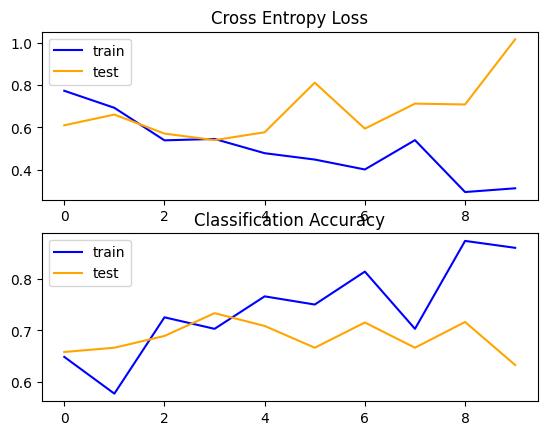

In [33]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()



Como se puede ver el modelo es bastante malo. El accuracy es de 64% y en cada época. En los gráficos se puede observar la pérdida y la exactitud de ambos conjuntos, de entrenamiento (azul) y prueba (test). En el gráfico de la pérdida, esta se mantiene casi constante para el conjunto de prueba, así que es posible que con más épocas no resuelva para nada el problema. En el caso de la exactitud sucede lo mismo parece ir en aumento a medida que transcurren las épocas pero parece ser un aumento bastante lento

### Arquitecturas
Usemos una arquitectura VGG de 2 bloques y veamos que sucede

In [34]:
modelo2 = keras.Sequential()
modelo2.add(keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
modelo2.add(keras.layers.MaxPooling2D((2,2)))
modelo2.add(keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
modelo2.add(keras.layers.MaxPooling2D((2,2)))
modelo2.add(keras.layers.Flatten())
modelo2.add(keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
modelo2.add(keras.layers.Dense(1,activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
modelo2.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,499,649 (78.20 MB)

 Trainable params: 20,499,649 (78.20 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history2 = modelo2.fit(train_it, steps_per_epoch=train_it.samples//train_it.batch_size,validation_data=test_it, validation_steps=test_it.samples//test_it.batch_size,epochs = 10,verbose = True )
modelo2.save(folder+'modelo2.keras')

Epoch 1/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 96s 328ms/step - accuracy: 0.5742 - loss: 0.8308 - val_accuracy: 0.7038 - val_loss: 0.5679
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.7188 - loss: 0.5565 - val_accuracy: 0.6667 - val_loss: 0.5926
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 98s 334ms/step - accuracy: 0.7140 - loss: 0.5525 - val_accuracy: 0.7451 - val_loss: 0.5175
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.6250 - loss: 0.6124 - val_accuracy: 0.6333 - val_loss: 0.5666
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 98s 335ms/step - accuracy: 0.7692 - loss: 0.4706 - val_accuracy: 0.7661 - val_loss: 0.4930
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - accuracy: 0.7656 - loss: 0.5170 - val_accuracy: 0.7000 - val_loss: 0.5215
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 98s 335ms/step - accuracy: 0.8258 - loss: 0.3860 - val_accuracy: 0.7643 - val_loss: 0.4939
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.8438 - loss: 0.345

In [36]:
loss , acc = modelo2.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.7777 - loss: 0.5357
> 77.341


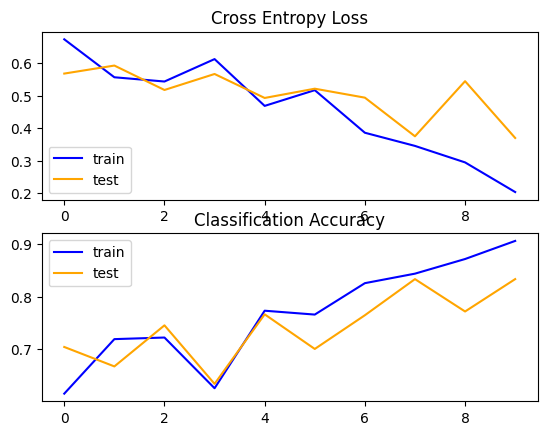

In [37]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history2.history['loss'], color='blue', label='train')
plt.plot(history2.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history2.history['accuracy'], color='blue', label='train')
plt.plot(history2.history['val_accuracy'], color='orange', label='test')
plt.legend()


Como podemos ver, mejoró notablemente la exactitud, un modelo más complejo hace que mejore el modelo.

### Dropout

In [38]:
modelo3 = keras.Sequential()
modelo3.add(keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
modelo3.add(keras.layers.MaxPooling2D((2,2)))
modelo3.add(keras.layers.Dropout(0.2))
modelo3.add(keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
modelo3.add(keras.layers.MaxPooling2D((2,2)))
modelo3.add(keras.layers.Dropout(0.2))
modelo3.add(keras.layers.Flatten())
modelo3.add(keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
modelo3.add(keras.layers.Dense(1,activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
modelo3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
modelo3.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,499,649 (78.20 MB)

 Trainable params: 20,499,649 (78.20 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history3 = modelo3.fit(train_it, steps_per_epoch=train_it.samples//train_it.batch_size,validation_data=test_it, validation_steps=test_it.samples//test_it.batch_size,epochs = 10,verbose = True )
modelo3.save(folder+'modelo3.keras')

Epoch 1/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 108s 367ms/step - accuracy: 0.5267 - loss: 0.7631 - val_accuracy: 0.5928 - val_loss: 0.6662
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.6094 - loss: 0.6863 - val_accuracy: 0.5000 - val_loss: 0.7004
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 110s 376ms/step - accuracy: 0.6065 - loss: 0.6545 - val_accuracy: 0.6097 - val_loss: 0.6501
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.7031 - loss: 0.5996 - val_accuracy: 0.4667 - val_loss: 0.7073
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 110s 375ms/step - accuracy: 0.6401 - loss: 0.6277 - val_accuracy: 0.6156 - val_loss: 0.6478
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.6719 - loss: 0.6243 - val_accuracy: 0.6667 - val_loss: 0.6183
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 109s 372ms/step - accuracy: 0.6481 - loss: 0.6176 - val_accuracy: 0.6338 - val_loss: 0.6293
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.6250 - loss: 0

In [40]:
loss , acc = modelo3.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.6779 - loss: 0.6080
> 67.375


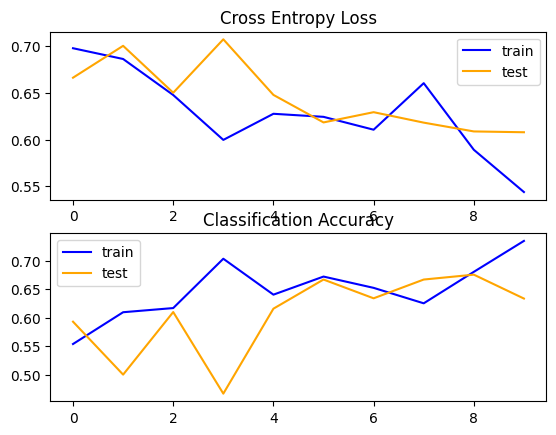

In [41]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history3.history['loss'], color='blue', label='train')
plt.plot(history3.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history3.history['accuracy'], color='blue', label='train')
plt.plot(history3.history['val_accuracy'], color='orange', label='test')
plt.legend()


### Image Data Augmentation
Para esto se necesitan dos ImageDataGenerator uno para el train y otro para el test

In [43]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = train_datagen.flow_from_directory(folder+"train1/train/", class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory(folder+"test1/test/", class_mode='binary', batch_size=64, target_size=(200, 200))


Found 18698 images belonging to 2 classes.
Found 6302 images belonging to 2 classes.


In [44]:
modelo4 = keras.Sequential()
modelo4.add(keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
modelo4.add(keras.layers.MaxPooling2D((2,2)))
modelo4.add(keras.layers.Dropout(0.2))
modelo4.add(keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
modelo4.add(keras.layers.MaxPooling2D((2,2)))
modelo4.add(keras.layers.Dropout(0.2))
modelo4.add(keras.layers.Flatten())
modelo4.add(keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
modelo4.add(keras.layers.Dense(1,activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
modelo4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
modelo4.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,499,649 (78.20 MB)

 Trainable params: 20,499,649 (78.20 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history4 = modelo4.fit(train_it, steps_per_epoch=train_it.samples//train_it.batch_size,validation_data=test_it, validation_steps=test_it.samples//test_it.batch_size,epochs = 10,verbose = True )
modelo4.save(folder+'modelo4.keras')

Epoch 1/10


c:\Documentos\Semestre8\DataScience\Ejercicios\CNN\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


292/292 ━━━━━━━━━━━━━━━━━━━━ 170s 574ms/step - accuracy: 0.5265 - loss: 0.8488 - val_accuracy: 0.5738 - val_loss: 0.6797
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.6094 - loss: 0.6853 - val_accuracy: 0.5000 - val_loss: 0.6729
Epoch 3/10


C:\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


292/292 ━━━━━━━━━━━━━━━━━━━━ 170s 573ms/step - accuracy: 0.5711 - loss: 0.6784 - val_accuracy: 0.5692 - val_loss: 0.6755
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.6094 - loss: 0.6675 - val_accuracy: 0.4333 - val_loss: 0.6941
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 163s 553ms/step - accuracy: 0.5921 - loss: 0.6690 - val_accuracy: 0.6247 - val_loss: 0.6548
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.5781 - loss: 0.6367 - val_accuracy: 0.8333 - val_loss: 0.6148
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 164s 554ms/step - accuracy: 0.6045 - loss: 0.6577 - val_accuracy: 0.5936 - val_loss: 0.6586
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - accuracy: 0.7031 - loss: 0.5856 - val_accuracy: 0.5333 - val_loss: 0.6767
Epoch 9/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 164s 554ms/step - accuracy: 0.6198 - loss: 0.6490 - val_accuracy: 0.5840 - val_loss: 0.6629
Epoch 10/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.6406 - loss: 0.6325 - va

In [47]:
loss , acc = modelo4.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.5938 - loss: 0.6573
> 59.806


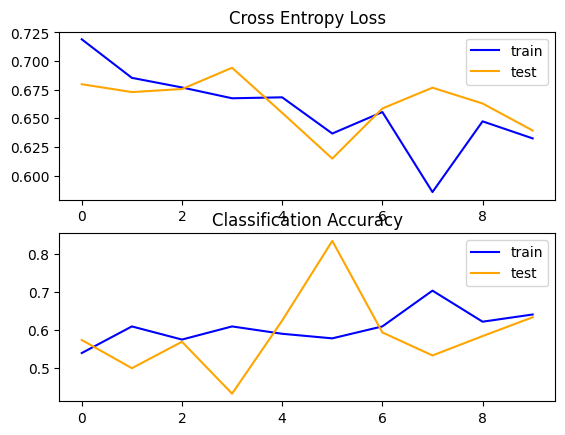

In [48]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history4.history['loss'], color='blue', label='train')
plt.plot(history4.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history4.history['accuracy'], color='blue', label='train')
plt.plot(history4.history['val_accuracy'], color='orange', label='test')
plt.legend()


## Predicción
Usaremos una imagen del conjunto de entrenamiento que se nos proporcionó para determinar si es un gato o un perro. Probemos el mejor modelo que obtuvimos. El modelo 2.


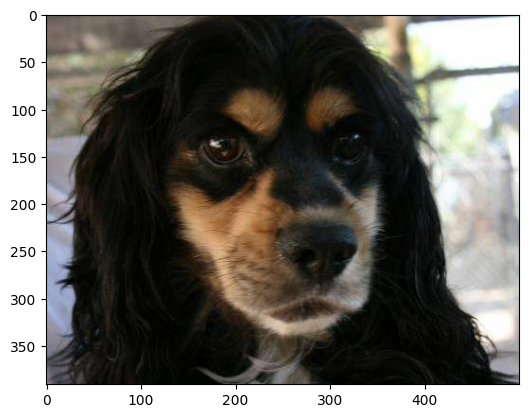

In [50]:
name = "./dogs-vs-cats/test1/test1/119.jpg"
foto = imread(name)
plt.imshow(foto)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Es un perro
1.0


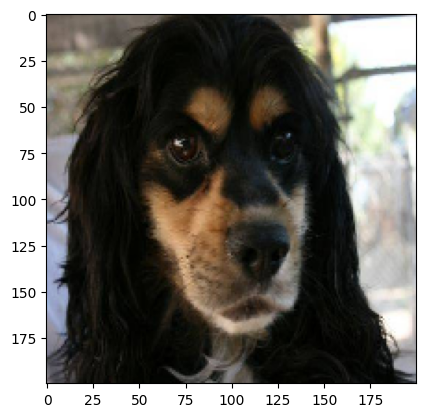

## Referencias
- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/